In [55]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

import config

In [56]:
url_main = 'http://api.census.gov/data/2018/abscs'
url_columns = '?get=NAME,EMP,EMPSZFI,EMPSZFI_LABEL,FIRMPDEMP'
url_focus = '&for=state:*'
url_key = config.key
full_url = f'{url_main}{url_columns}{url_focus}{url_key}'
response = requests.get(full_url)

In [57]:
full_data = pd.read_json(response.text)
full_data.columns = full_data.iloc[0]
full_data.drop(index=0,inplace=True)
full_data.rename(columns={"NAME":"state_name","EMP":"employees","EMPSZFI_LABEL":"size_label","FIRMPDEMP":"firms","state":"state_number"},inplace=True)
wisconsin = full_data[full_data['state_name']=='Wisconsin']
wisconsin.head()

,state_name,employees,EMPSZFI,size_label,firms,state_number
251,Wisconsin,2595886,001,All firms,103744,55
252,Wisconsin,0,611,Firms with no employees,11104,55
253,Wisconsin,93183,612,Firms with 1 to 4 employees,45587,55
254,Wisconsin,108911,620,Firms with 5 to 9 employees,16379,55
255,Wisconsin,164497,630,Firms with 10 to 19 employees,12332,55


In [64]:
wisconsin['firms'] = wisconsin['firms'].astype(int)
wisconsin = wisconsin[wisconsin['size_label'] != 'All firms']
wisconsin.head()

C:\Users\amyyu\AppData\Local\Temp/ipykernel_136644/2468936682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wisconsin['firms'] = wisconsin['firms'].astype(int)


,state_name,employees,EMPSZFI,size_label,firms,state_number
252,Wisconsin,0,611,Firms with no employees,11104,55
253,Wisconsin,93183,612,Firms with 1 to 4 employees,45587,55
254,Wisconsin,108911,620,Firms with 5 to 9 employees,16379,55
255,Wisconsin,164497,630,Firms with 10 to 19 employees,12332,55
256,Wisconsin,282941,641,Firms with 20 to 49 employees,9219,55


In [65]:
sns.set_style('darkgrid')

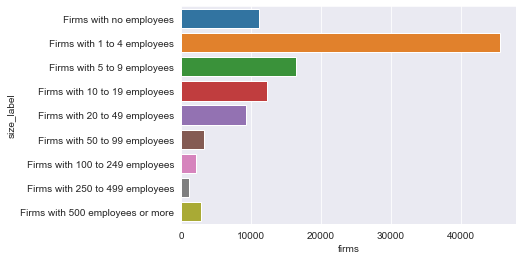

In [66]:
sns.barplot(x='firms',y='size_label',data=wisconsin);